# Lotka-Volterra simulator: joint ratio variance vs theta distance

In [1]:
import numpy as np
import corner
from matplotlib import pyplot as plt
%matplotlib inline
import logging
import matplotlib

from goldmine.simulators.lotka_volterra import LotkaVolterra

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')
logging.getLogger().setLevel(logging.INFO)

## Run simulator and collect log r, t

In [2]:
simulator = LotkaVolterra()
theta0 = simulator.theta_defaults(single_theta=True)[0][0]
print(theta0)

[-4.60517019 -0.69314718  0.         -4.60517019]


In [3]:
n_thetas = 25
n_samples = 25

In [4]:
dthetas = []
log_r_xz = []
t_xz = []

distances = np.exp(np.linspace(np.log(0.01), np.log(0.5), n_thetas))
r_variances = []

for i_theta, distance in enumerate(distances):
    logging.info('Starting simulation for distance %s', distance)
    
    dtheta = np.random.rand(4)
    dtheta *= distance / np.linalg.norm(dtheta)
    theta1 = theta0 + dtheta
    
    x, this_r_xz = simulator.rvs_ratio(theta0, theta1, theta0, n_samples)
    
    logging.info('r(x,z): %s', this_r_xz)
    logging.info('Var r(x,z) = %s', np.var(this_r_xz))
    
    r_variances.append(np.var(this_r_xz))

r_variances = np.array(r_variances)


11:09  Starting simulation for distance 0.010000000000000004
11:09  r(x,z): [0.56925734 0.33786268 0.44043523 1.21677118 1.30874228 0.97982526
 0.59841692 0.71297475 0.63895117 1.19509828 1.48923016 1.34351699
 1.36141054 0.35843021 0.90217735 0.38461312 0.57037944 1.02970466
 0.67687863 0.72767026 1.1752057  0.98235623 1.0814782  1.02894532
 0.56541108]
11:09  Var r(x,z) = 0.11716281055611802
11:09  Starting simulation for distance 0.01177037817948716
11:09  r(x,z): [1.03352587 0.68804643 0.9451239  1.04334716 1.04052932 0.56007998
 0.96691911 0.63093864 0.56010621 1.60445127 0.59574113 0.86397286
 1.29408363 0.94901044 2.24415705 2.2085295  1.43582274 0.92692015
 1.3798636  0.53883699 0.50351599 0.46589495 0.64492377 1.24255245
 0.69518542]
11:09  Var r(x,z) = 0.22543348728592627
11:09  Starting simulation for distance 0.01385418024881475
11:10  r(x,z): [0.77622956 1.00167436 0.82013424 0.33095647 0.74640817 0.79533448
 1.12810516 0.51244298 1.44627436 0.94976025 0.51645947 1.1585469

11:14  Var r(x,z) = 0.00010131778543320721
11:14  Starting simulation for distance 0.22131860294287997
11:15  r(x,z): [1.66152198e-10 6.22346782e-15 2.01231590e-29 1.81535912e-17
 7.44736109e-25 2.61150347e-13 1.43450646e-06 7.36154122e-16
 2.74940536e-21 6.74495423e-08 2.53965870e-23 1.17947952e-16
 2.12168024e-14 1.25846451e+00 8.03531037e-10 8.58686390e-11
 1.46421851e-10 3.69567776e-22 4.40245566e-15 1.47759841e-09
 1.89265599e-19 1.36840331e-06 3.19700354e-18 1.91960328e-15
 2.02192184e-16]
11:15  Var r(x,z) = 0.0608153325266267
11:15  Starting simulation for distance 0.2605003654793456
11:15  r(x,z): [1.18964492e-19 2.19298882e-02 1.54673967e-26 1.19053446e-15
 1.42734939e-23 4.59486210e-22 1.93321156e-23 1.06264578e-24
 3.09120708e-24 1.64757389e-22 1.21435713e-29 3.04406182e-25
 4.10839587e-13 4.84858937e-23 2.23578397e-04 2.93315037e-10
 1.78980651e-19 1.23815872e-21 5.64134856e-09 6.23248442e-18
 5.05238643e-20 3.50860658e-19 6.38109126e-11 4.61612419e-17
 4.36865863e-22]
11:

## Plot theta distance vs r variance

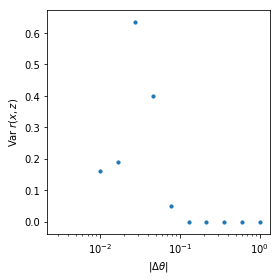

In [8]:
fig = plt.figure(figsize=(4,4))
ax = plt.gca()

sc = plt.scatter(distances, r_variances, s=10.)

plt.xlabel(r'$|\Delta \theta|$')
plt.ylabel(r'$\mathrm{Var}\;r(x,z)$')
#plt.xlim(0.008,1.2)
#plt.ylim(0.,1000.)
ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

plt.tight_layout()
#plt.savefig('lv_local_model_zoom.pdf')
plt.show()